In [14]:
from sam.data_formats import load_files, DoseResponseSeries
import os
from sam import chdir_to_repopath
chdir_to_repopath()
from sam.dose_reponse_fit import dose_response_fit, ModelPredictions, survival_to_stress, FitSettings, Transforms, stress_to_survival
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns
from sam.data_formats import read_data, load_files
from sam.plotting import plot_fit_prediction
from sam.system_stress import pred_surv_without_hormesis
from sam.helpers import detect_hormesis_index, pad_c0, compute_lc_from_curve, weibull_2param, weibull_2param_inverse
from sam.data_formats import ExperimentData

In [15]:
seven = read_data("data/2019 Naeem-Esf, Pro, food/7_days.xlsx")
twentie = read_data("data/2019 Naeem-Esf, Pro, food/21_days.xlsx")


seven_fit = dose_response_fit(seven.main_series, cfg=FitSettings(survival_max=seven.meta.max_survival))
twentie_fit = dose_response_fit(twentie.main_series, cfg=FitSettings(survival_max=seven.meta.max_survival))

In [28]:
def find_lc_from_curve(curve, lc):
    ncurve = curve.copy()
    ncurve /= ncurve[0]
    
    lc = 1 - lc / 100
    arg = np.argwhere(ncurve < lc)[0,0]
    return seven_fit.concentration_curve[arg], curve[arg]

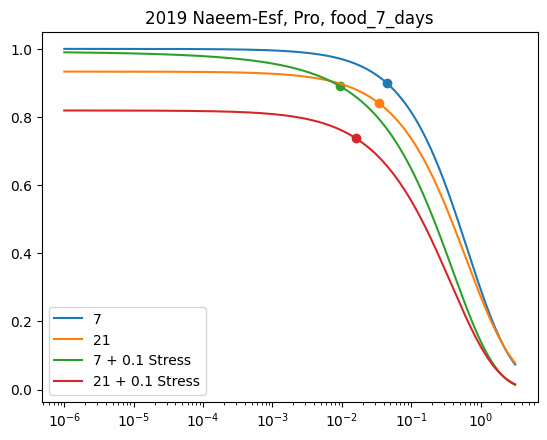

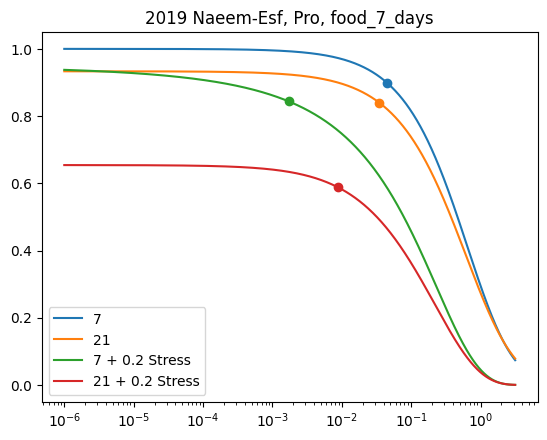

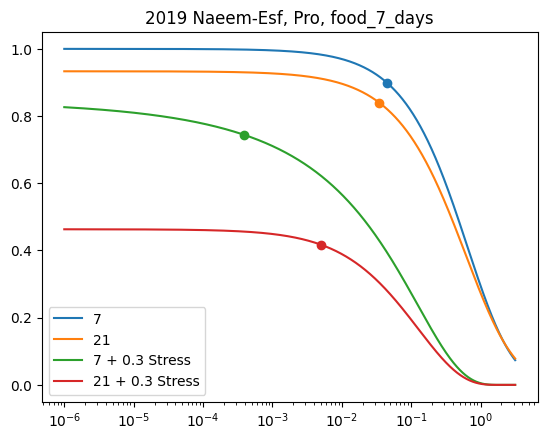

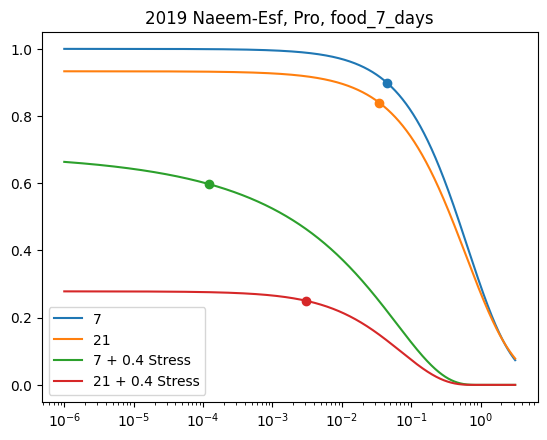

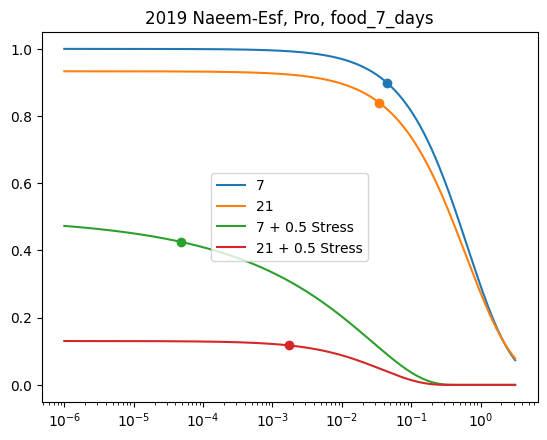

In [35]:
for stress in [0.1,0.2,0.3,0.4,0.5]:
    plt.plot(seven_fit.concentration_curve,seven_fit.survival_curve, label = "7")
    plt.scatter(*find_lc_from_curve(seven_fit.survival_curve, 10))
    plt.plot(twentie_fit.concentration_curve,twentie_fit.survival_curve, label = "21")
    plt.scatter(*find_lc_from_curve(twentie_fit.survival_curve, 10))

    c = stress_to_survival(stress + seven_fit.stress_curve)
    plt.plot(seven_fit.concentration_curve,stress_to_survival(stress + seven_fit.stress_curve), label = f"7 + {stress} Stress")
    plt.scatter(*find_lc_from_curve(c,10))
    c = stress_to_survival(stress + twentie_fit.stress_curve)
    plt.plot(seven_fit.concentration_curve,stress_to_survival(stress + twentie_fit.stress_curve), label = f"21 + {stress} Stress")
    plt.scatter(*find_lc_from_curve(c,10))


    plt.title(seven.meta.title)
    plt.xscale("log")
    plt.legend()
    plt.show()